# Covid-19: Confirmed

## Get Data and clean up
Removing Lat&Long. Not needed.

In [31]:
import pandas as pd
df = pd.read_csv('data/time_series_19-covid-Confirmed.csv')
df = df.drop(columns=['Lat', 'Long'])
population_china = 1400050000
population_germany = 83019213
population_overall = 7418000000


## Group by Countries
1. Group by countries 
2. get Dataframes for each country I would like to plot
3. get all aggregated


In [32]:
df_group = df.groupby(['Country/Region'])

In [33]:
germany = df_group.get_group('Germany')
china = df_group.get_group('Mainland China')

In [34]:
overall = df.agg(['sum'])
overall = overall.drop(columns=['Country/Region'])

## Clean up and summarize China
1. Clean data, remove columns with no numbers
2. Transpose DF

In [35]:
china = china.agg(['sum'])
china = china.drop(columns=['Province/State', 'Country/Region'])

In [36]:
china = china.T

In [37]:
china['related'] = (100/population_china) * china['sum']

## Clean up and summarize Germany

In [38]:
germany = germany.agg(['sum'])
germany = germany.drop(columns=['Province/State', 'Country/Region'])

In [39]:
germany = germany.T
germany['related'] = (100/population_germany) * germany['sum']

## Transpose overall data

In [40]:
overall = overall.T
overall['related'] = (100/population_overall) * overall['sum']

In [41]:
germany.to_csv('data/confirmed_germany.csv')
china.to_csv('data/confirmed_china.csv')
overall.to_csv('data/confirmed_overall.csv')



## Plot China & Germany in one Graph

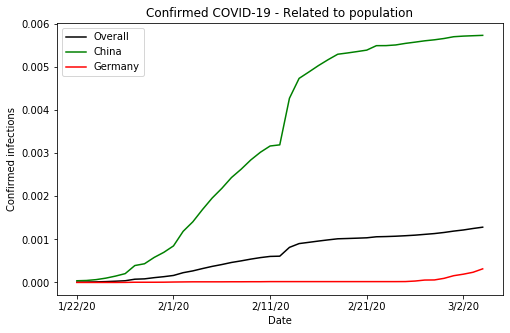

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ax = plt.gca()

overall.plot(kind='line',y='related',ax=ax, label="Overall", color='black')
china.plot(kind='line',y='related',ax=ax, label="China", color="green")
germany.plot(kind='line',y='related',ax=ax, color='red', label="Germany")

plt.xlabel('Date')
plt.ylabel('Confirmed infections')
plt.title('Confirmed COVID-19 - Related to population')
plt.savefig('confirmed_compared_related.png', dpi=300)
plt.show()